# Overview

This section provides an overview of the aperiodic methods project. 

The following notebooks introduce the project:
- 00-Overview: this notebook, which has a general overview of the project
- 01-LiteratureSearch: which surveys the literature for the prevalence of these methods
- 02-Simulations: which introduces and describes the simulations used in this study

In [1]:
from fooof import FOOOF
from fooof.plts.annotate import plot_annotated_model

from neurodsp.plts import plot_time_series, plot_power_spectra
from neurodsp.spectral import compute_spectrum

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from apm.sim.examples import TIMES, SIG_COMB
from apm.sim.settings import FS

## Project Guide

This project is an investigation of available methods for investigating aperiodic neural activity.

### Tooling

The following tools are used in this project:

- [neurodsp](https://github.com/neurodsp-tools/neurodsp) is used for simulating data and applying DSP measures
- [specparam](https://github.com/fooof-tools/fooof) is used for simulating and parameterizing power spectra
- [antropy](https://github.com/raphaelvallat/antropy) is used for complexity and entropy measures
- [lisc](https://github.com/lisc-tools/lisc) is used for the literature analyses

## Aperiodic Activity

This section introduces basic concepts of aperiodic activity. 

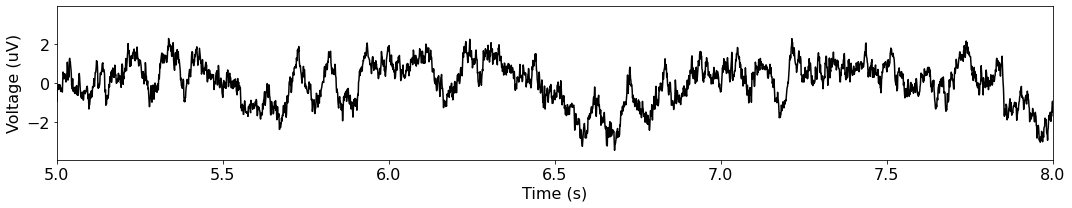

In [3]:
# Visualize a simulated neural time series
plot_time_series(TIMES, SIG_COMB, xlim=[5, 8])

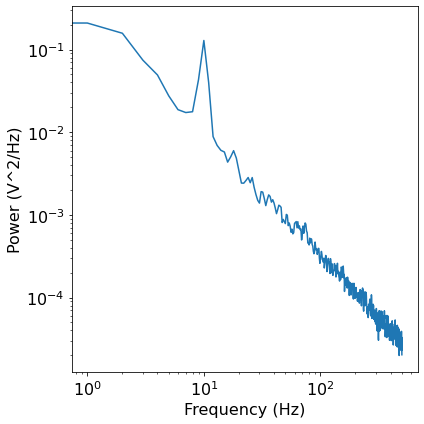

In [4]:
# Compute and visualize a power spectrum from the above signal
freqs, powers = compute_spectrum(SIG_COMB, FS)
plot_power_spectra(freqs, powers)

### SpecParam Demo

[SpecParam](https://fooof-tools.github.io/) is one of the methods that will be investigated in this project. SpecParam is a tool for parameterizing neural power spectra. 

Here we will briefly demonstrate applying spectral parameterization to an example spectrum, to demonstrate the different features of the data that we are interested in. 

In [5]:
# Initialize and fit a spectral parameterization model
fm = FOOOF(peak_width_limits=[1, 8], min_peak_height=0.1, verbose=False)
fm.fit(freqs, powers, [1, 75])

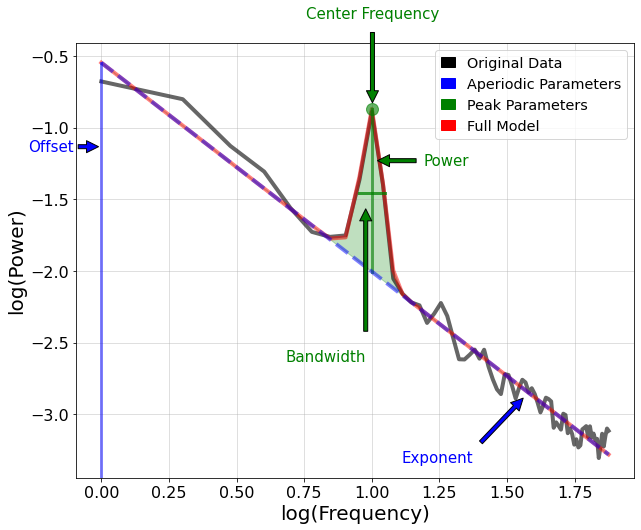

In [6]:
# Visualize an annoted model
plot_annotated_model(fm, True)